In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as k

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
img_width=150
img_height=150

train_data_dir='C:/Users/HP/Downloads/pets/train'
validation_data_dir='C:/Users/HP/Downloads/pets/validation'
train_samples=120
validation_samples=30
epochs=5
batch_size=20

if k.image_data_format() == 'channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width, img_height, 3)


In [3]:
model=Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
import keras 
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.Adam(lr=.0001),
             metrics=['accuracy'])

In [5]:
train_datagen= ImageDataGenerator(
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [6]:
test_datagen=ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator=train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')

Found 198 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:
imgs, labels=next(train_generator)

In [10]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show

20
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0


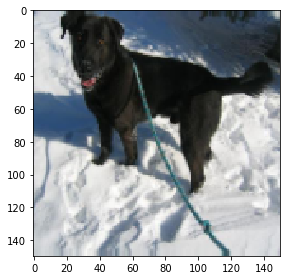

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

image_batch, label_batch= train_generator.next()

print(len(image_batch))
for i in range(0, len(image_batch)):
    image=image_batch[i]
    print(label_batch[i])
    imshow(image)

In [12]:
validation_generator=train_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='binary')

Found 100 images belonging to 2 classes.


In [14]:
history=model.fit_generator(
train_generator,
steps_per_epoch=train_samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=validation_samples // batch_size)

Epoch 1/5
6/6 [==============================] - 6s 967ms/step - loss: 0.7108 - accuracy: 0.4917 - val_loss: 0.6946 - val_accuracy: 0.4500
Epoch 2/5
6/6 [==============================] - 5s 902ms/step - loss: 0.6904 - accuracy: 0.5424 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 3/5
6/6 [==============================] - 6s 947ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.4500
Epoch 4/5
6/6 [==============================] - 4s 745ms/step - loss: 0.6906 - accuracy: 0.5678 - val_loss: 0.6795 - val_accuracy: 0.6000
Epoch 5/5
6/6 [==============================] - 3s 503ms/step - loss: 0.6999 - accuracy: 0.4750 - val_loss: 0.6778 - val_accuracy: 0.5500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


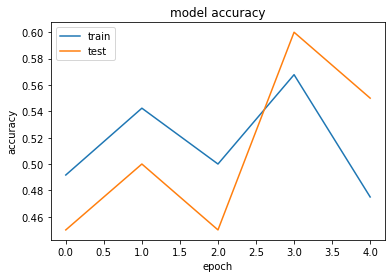

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

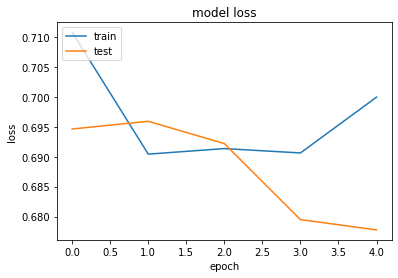

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()